In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\hp\Downloads\spam.csv', encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2125,ham,"Sorry im getting up now, feel really bad- tota...",NaN,NaN,NaN
5529,ham,What about this one then.,NaN,NaN,NaN
484,ham,You should change your fb to jaykwon thuglyfe ...,NaN,NaN,NaN
410,ham,Come by our room at some point so we can iron ...,NaN,NaN,NaN
1273,spam,network operator. The service is free. For T &...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
##1.DATA CLEANING

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
4143,ham,That's a shame! Maybe cld meet for few hrs tomo?
864,ham,Dude ive been seeing a lotta corvettes lately
2631,spam,"URGENT! Your mobile No 077xxx WON a å£2,000 Bo..."
396,ham,Was actually sleeping and still might when u c...
3714,ham,"I am late,so call you tomorrow morning.take ca..."


In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.sample(5)

,target,text
1674,ham,Nah dub but je still buff
2204,ham,Raji..pls do me a favour. Pls convey my Birthd...
1690,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...
4713,ham,Oops i thk i dun haf enuff... I go check then ...
843,spam,Urgent! call 09066350750 from your landline. Y...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(403)

In [16]:
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.shape

(5169, 2)

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

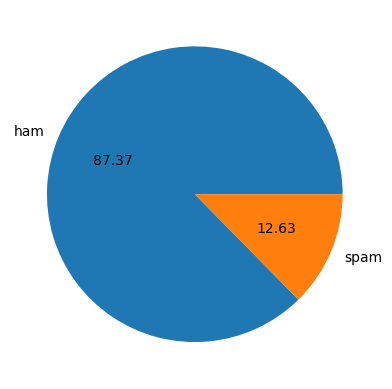

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [22]:
import nltk
print(nltk.data.path)

['C:\\Users\\hp/nltk_data', 'C:\\ProgramData\\anaconda3\\nltk_data', 'C:\\ProgramData\\anaconda3\\share\\nltk_data', 'C:\\ProgramData\\anaconda3\\lib\\nltk_data', 'C:\\Users\\hp\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [23]:
import sys
print(sys.executable)

C:\ProgramData\anaconda3\python.exe


In [24]:
!"C:\ProgramData\anaconda3\python.exe" -m pip install nltk --user

In [25]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [26]:
df['num_characters']=df['text'].apply(len)

In [27]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [35]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

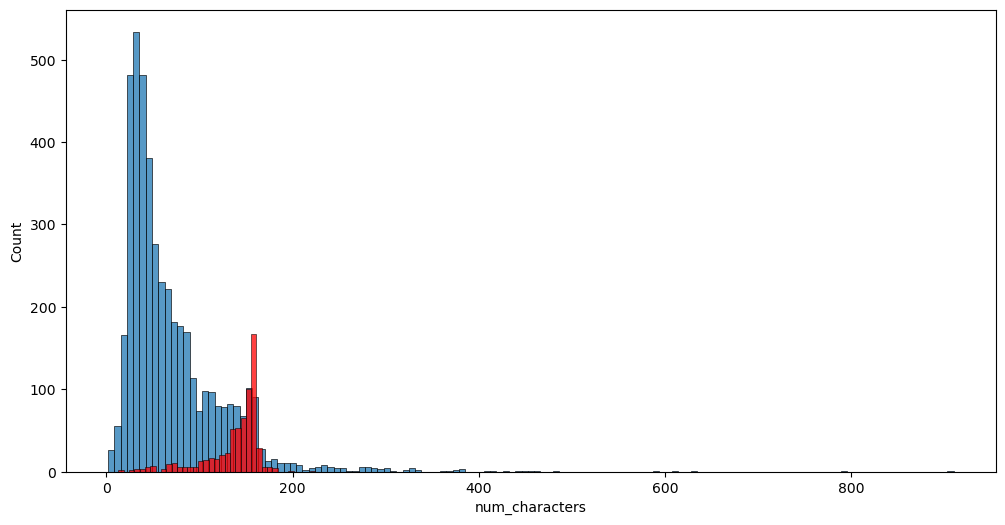

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

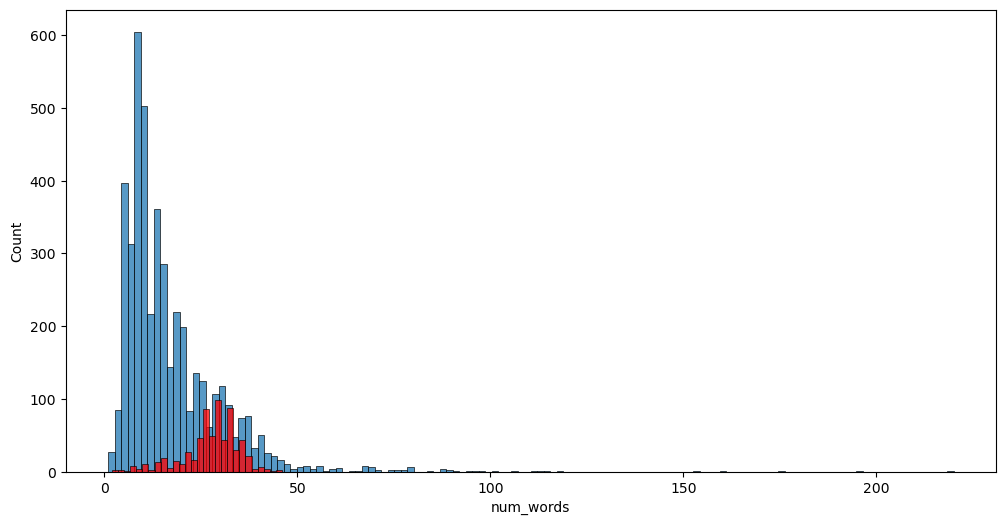

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

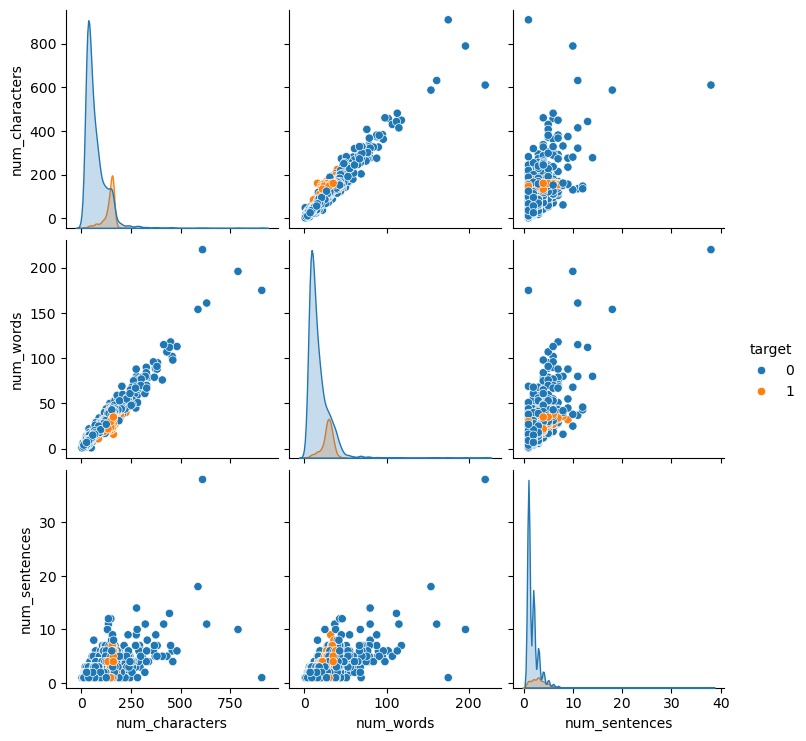

In [38]:
sns.pairplot(df, hue='target')

<Axes: >

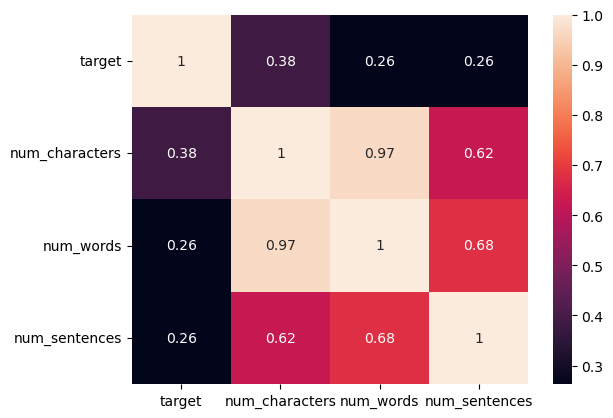

In [39]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [40]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return y        

In [41]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [43]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('studying')


'studi'

In [45]:
transform_text('Hi, how are you @ yogini ?')

['hi', 'yogini']

In [46]:
df['transformed_text']=df['text'].apply(transform_text)

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [48]:
pip install WordCloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [49]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [50]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].astype(str).str.cat(sep=" "))

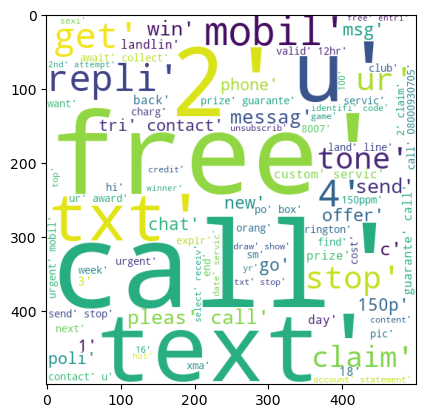

In [51]:
plt.imshow(spam_wc)

In [52]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].astype(str).str.cat(sep=" "))

In [53]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

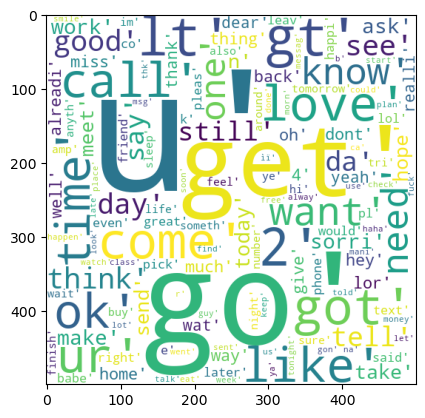

In [54]:
plt.imshow(ham_wc)

In [55]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [56]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text']:
    for word in msg:
        spam_corpus.append(word)
    print(msg)

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18']
['freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv']
['winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour']
['mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030']
['six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info']
['urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18']
['xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'c

In [57]:
len(spam_corpus)

9939

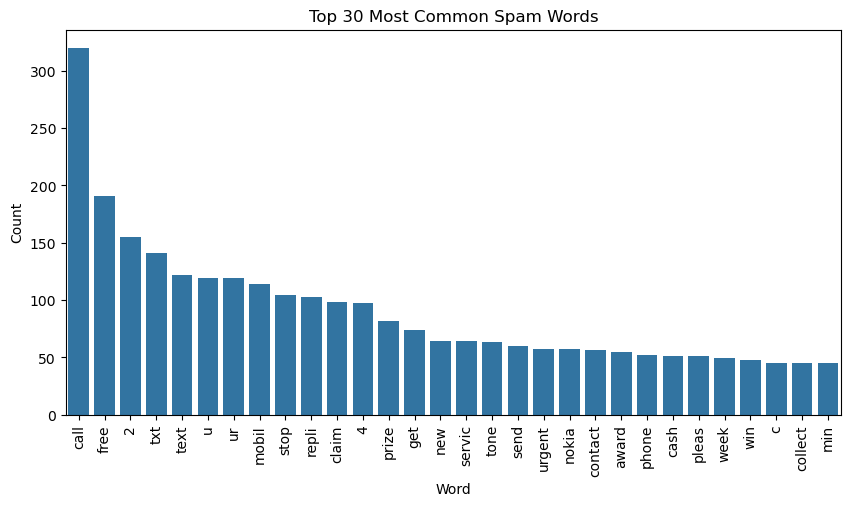

In [58]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create dataframe for top 30 most common words
spam_df = pd.DataFrame(Counter(spam_corpus).most_common(30), 
                       columns=['Word', 'Count'])

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x='Word', y='Count', data=spam_df)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Spam Words')
plt.show()

In [59]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text']:
    for word in msg:
        ham_corpus.append(word)
    print(msg)

['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat']
['ok', 'lar', 'joke', 'wif', 'u', 'oni']
['u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say']
['nah', 'think', 'goe', 'usf', 'live', 'around', 'though']
['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent']
['per', 'request', 'mell', 'oru', 'minnaminungint', 'nurungu', 'vettam', 'set', 'callertun', 'caller', 'press', '9', 'copi', 'friend', 'callertun']
['gon', 'na', 'home', 'soon', 'want', 'talk', 'stuff', 'anymor', 'tonight', 'k', 'cri', 'enough', 'today']
['search', 'right', 'word', 'thank', 'breather', 'promis', 'wont', 'take', 'help', 'grant', 'fulfil', 'promis', 'wonder', 'bless', 'time']
['date', 'sunday']
['oh', 'k', 'watch']
['eh', 'u', 'rememb', '2', 'spell', 'name', 'ye', 'v', 'naughti', 'make', 'v', 'wet']
['fine', 'thatåõ', 'way', 'u', 'feel', 'thatåõ', 'way', 'gota', 'b']
['serious', 'spell', 'name']
['go', 'tri', '2', 'm

In [60]:
len(ham_corpus)

35404

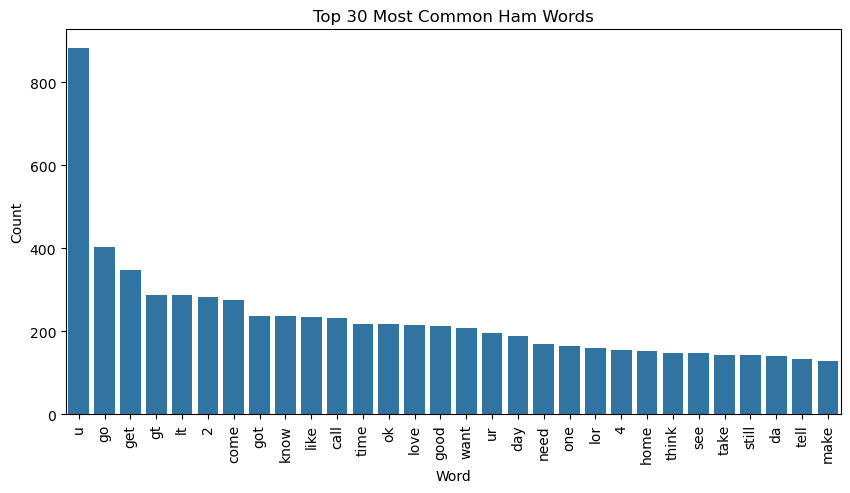

In [61]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create dataframe for top 30 most common words
ham_df = pd.DataFrame(Counter(ham_corpus).most_common(30), 
                       columns=['Word', 'Count'])

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x='Word', y='Count', data=ham_df)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Ham Words')
plt.show()

In [62]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf=TfidfVectorizer()
df['transformed_text'] = df['transformed_text'].fillna('').astype(str)
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [63]:
X.shape  

(5169, 6708)

In [64]:
y=df['target'].values

In [65]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [68]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [69]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [70]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [71]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [72]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [73]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [74]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import ExtraTreesClassifier

from xgboost import XGBClassifier

from sklearn.ensemble import GradientBoostingClassifier

In [75]:
svc =SVC(kernel='sigmoid', gamma=1.0)

knc= KNeighborsClassifier()

mnb= MultinomialNB()

dtc= DecisionTreeClassifier(max_depth=5)

lrc= LogisticRegression (solver='liblinear', penalty='11')

rfc= RandomForestClassifier(n_estimators=50, random_state=2)

abc = AdaBoostClassifier(n_estimators=50, random_state=2)

bc= BaggingClassifier(n_estimators=50, random_state=2)

etc= ExtraTreesClassifier(n_estimators=50, random_state=2)

gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)

xgb = XGBClassifier(n_estimators=50,random_state=2)



In [76]:
clfs = {

'SVC': svc,

'KN': knc,

'NB': mnb,

'DT': dtc,

'LR': lrc,

'RF': rfc,

'AdaBoost': abc,

'BgC': bc,

'ETC': etc,

'GBDT':gbdt,

'xgb':xgb
}    

In [77]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clf, X_train, y_train, X_test,y_test):
    

    clf.fit(X_train, y_train)

    y_pred= clf.predict(X_test)

    accuracy= accuracy_score(y_test,y_pred)
    precision= precision_score(y_test,y_pred)
    return accuracy, precision





In [78]:
train_classifier(svc, X_train, y_train, X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [79]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    try:
        current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
        print("For:", name)
        print("Accuracy:", current_accuracy)
        print("Precision:", current_precision)
        accuracy_scores.append(current_accuracy)
        precision_scores.append(current_precision)
    except Exception as e:
        print(f"Error with classifier {name}: {e}")

For: SVC
Accuracy: 0.9729206963249516
Precision: 0.9741379310344828
For: KN
Accuracy: 0.9003868471953579
Precision: 1.0
For: NB
Accuracy: 0.9593810444874274
Precision: 1.0
For: DT
Accuracy: 0.9352030947775629
Precision: 0.8380952380952381
Error with classifier LR: The 'penalty' parameter of LogisticRegression must be a str among {'l2', 'l1', 'elasticnet'} or None. Got '11' instead.
For: RF
Accuracy: 0.971953578336557
Precision: 1.0
For: AdaBoost
Accuracy: 0.9245647969052224
Precision: 0.8409090909090909
For: BgC
Accuracy: 0.9584139264990329
Precision: 0.8625954198473282
For: ETC
Accuracy: 0.9729206963249516
Precision: 0.9824561403508771
For: GBDT
Accuracy: 0.9526112185686654
Precision: 0.9238095238095239
For: xgb
Accuracy: 0.9748549323017408
Precision: 0.9516129032258065


In [80]:
print("Algorithms:", len(list(clfs.keys())))
print("Accuracy scores:", len(accuracy_scores))
print("Precision scores:", len(precision_scores))

Algorithms: 11
Accuracy scores: 10
Precision scores: 10


In [81]:

valid_algorithms = list(clfs.keys())[:len(accuracy_scores)]

performance_df = pd.DataFrame({
    'Algorithm': valid_algorithms,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})

In [82]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.972921,0.974138
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
3,DT,0.935203,0.838095
4,LR,0.971954,1.000000
5,RF,0.924565,0.840909
6,AdaBoost,0.958414,0.862595
7,BgC,0.972921,0.982456
8,ETC,0.952611,0.923810
9,GBDT,0.974855,0.951613


In [83]:
performance_df1=pd.melt(performance_df, id_vars="Algorithm")

In [84]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.972921
1,KN,Accuracy,0.900387
2,NB,Accuracy,0.959381
3,DT,Accuracy,0.935203
4,LR,Accuracy,0.971954
5,RF,Accuracy,0.924565
6,AdaBoost,Accuracy,0.958414
7,BgC,Accuracy,0.972921
8,ETC,Accuracy,0.952611
9,GBDT,Accuracy,0.974855


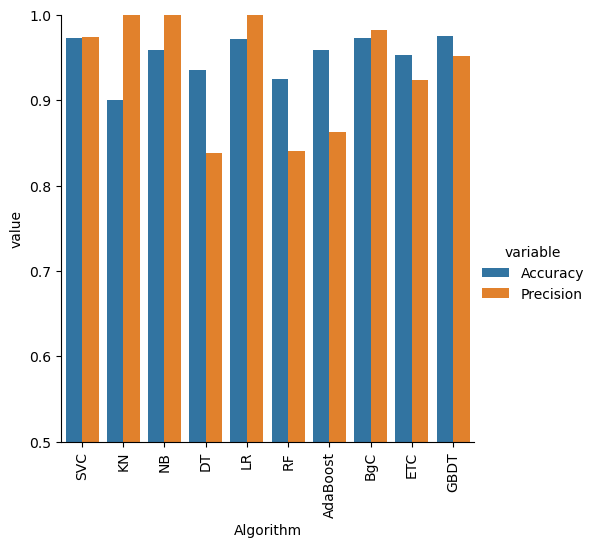

In [85]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [86]:
min_len = min(len(clfs), len(accuracy_scores), len(precision_scores))

temp_df = pd.DataFrame({
    'Algorithm': list(clfs.keys())[:min_len],
    'Accuracy_max_ft_3000': accuracy_scores[:min_len],
    'Precision_max_ft_3000': precision_scores[:min_len]
})

In [87]:
temp_df
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.972921,0.974138,0.972921,0.974138
1,KN,0.900387,1.000000,0.900387,1.000000
2,NB,0.959381,1.000000,0.959381,1.000000
3,DT,0.935203,0.838095,0.935203,0.838095
4,LR,0.971954,1.000000,0.971954,1.000000
5,RF,0.924565,0.840909,0.924565,0.840909
6,AdaBoost,0.958414,0.862595,0.958414,0.862595
7,BgC,0.972921,0.982456,0.972921,0.982456
8,ETC,0.952611,0.923810,0.952611,0.923810
9,GBDT,0.974855,0.951613,0.974855,0.951613


In [88]:
min_len = min(len(clfs), len(accuracy_scores), len(precision_scores))

temp_df = pd.DataFrame({
    'Algorithm': list(clfs.keys())[:min_len],
    'Accuracy_scaling': accuracy_scores[:min_len],
    'Precision_scaling': precision_scores[:min_len]
})

In [89]:
new_df=performance_df.merge(temp_df,on='Algorithm')

In [90]:
new_df_scaled=new_df.merge(temp_df,on='Algorithm')

In [91]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,SVC,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138
1,KN,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000
2,NB,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000
3,DT,0.935203,0.838095,0.935203,0.838095,0.935203,0.838095
4,LR,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
5,RF,0.924565,0.840909,0.924565,0.840909,0.924565,0.840909
6,AdaBoost,0.958414,0.862595,0.958414,0.862595,0.958414,0.862595
7,BgC,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
8,ETC,0.952611,0.923810,0.952611,0.923810,0.952611,0.923810
9,GBDT,0.974855,0.951613,0.974855,0.951613,0.974855,0.951613


In [92]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)
df['transformed_text'] = df['transformed_text'].fillna('').astype(str)
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [93]:
X=np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [94]:
X.shape

(5169, 3001)

In [95]:
y=df['target'].values

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
min_len = min(len(clfs), len(accuracy_scores), len(precision_scores))

temp_df = pd.DataFrame({
    'Algorithm': list(clfs.keys())[:min_len],
    'Accuracy_num_scores': accuracy_scores[:min_len],
    'Precision_num_scores': precision_scores[:min_len]
})

In [98]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_scores,Precision_num_scores
0,SVC,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138
1,KN,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000
2,NB,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000
3,DT,0.935203,0.838095,0.935203,0.838095,0.935203,0.838095,0.935203,0.838095
4,LR,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
5,RF,0.924565,0.840909,0.924565,0.840909,0.924565,0.840909,0.924565,0.840909
6,AdaBoost,0.958414,0.862595,0.958414,0.862595,0.958414,0.862595,0.958414,0.862595
7,BgC,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
8,ETC,0.952611,0.923810,0.952611,0.923810,0.952611,0.923810,0.952611,0.923810
9,GBDT,0.974855,0.951613,0.974855,0.951613,0.974855,0.951613,0.974855,0.951613


In [99]:
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier

In [100]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [101]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [102]:
y_pred=voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 1.0


In [103]:
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [104]:
from sklearn.ensemble import StackingClassifier

In [105]:
clf=StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [109]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# ✅ Small sample dataset created manually
sample_df = pd.DataFrame({
    'message': [
        "Hello there",
        "Free money now!!!",
        "How are you doing today?",
        "Win a lottery instantly",
        "Let's meet tomorrow"
    ],
    'target': [0, 1, 0, 1, 0]   # 0 = ham, 1 = spam
})

# ✅ TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=300, stop_words='english')
X = tfidf.fit_transform(sample_df['message']).toarray()
y = sample_df['target'].values

# ✅ Train Naive Bayes model
model = MultinomialNB()
model.fit(X, y)

print("✅ Model trained successfully on sample data!")

✅ Model trained successfully on sample data!


In [111]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))